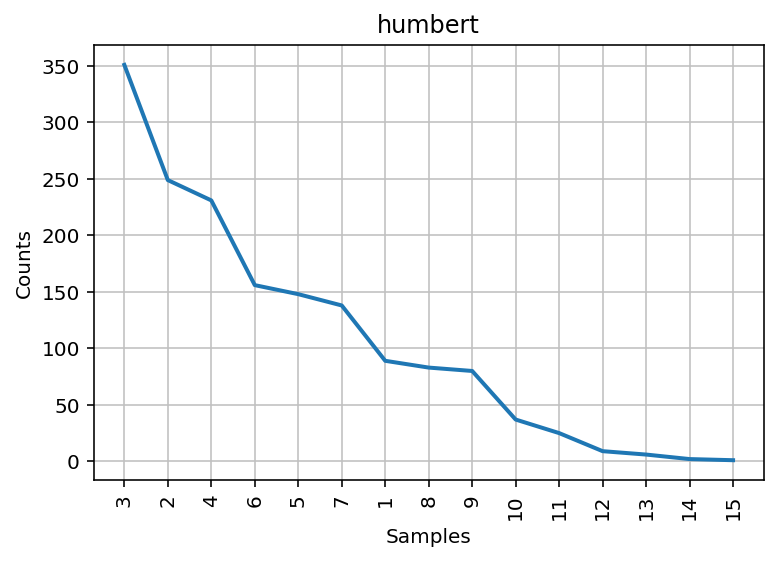

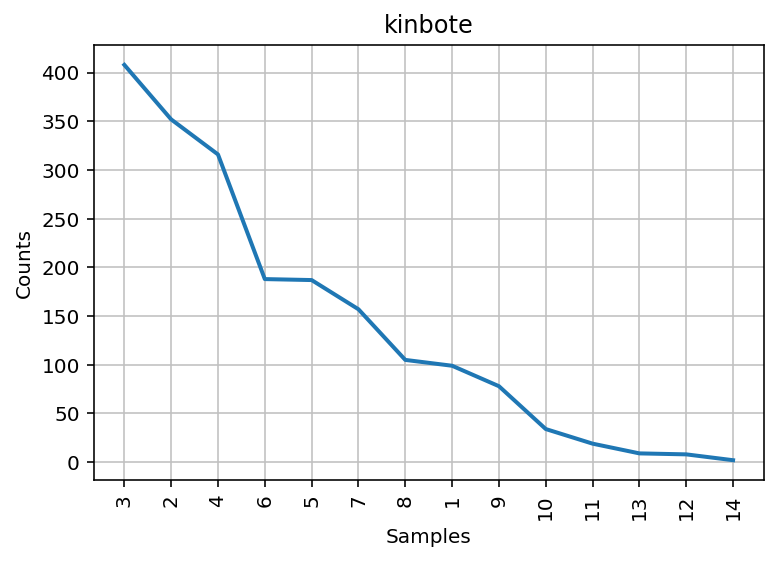

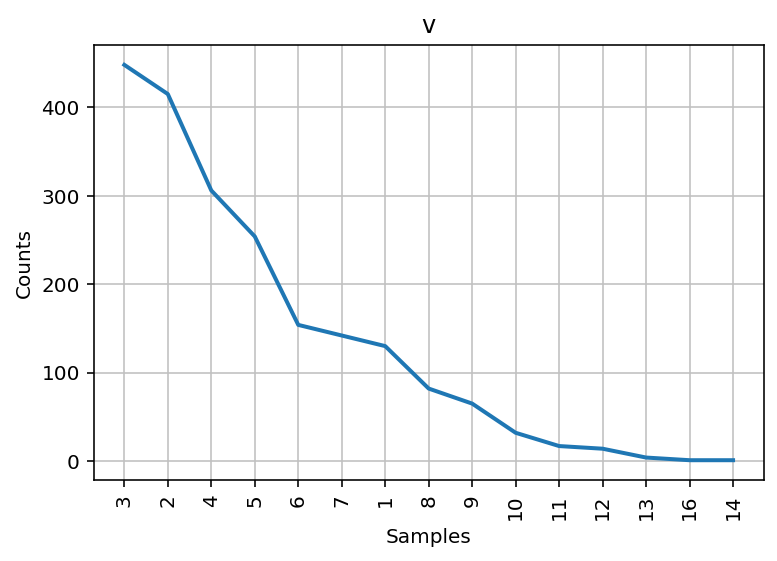

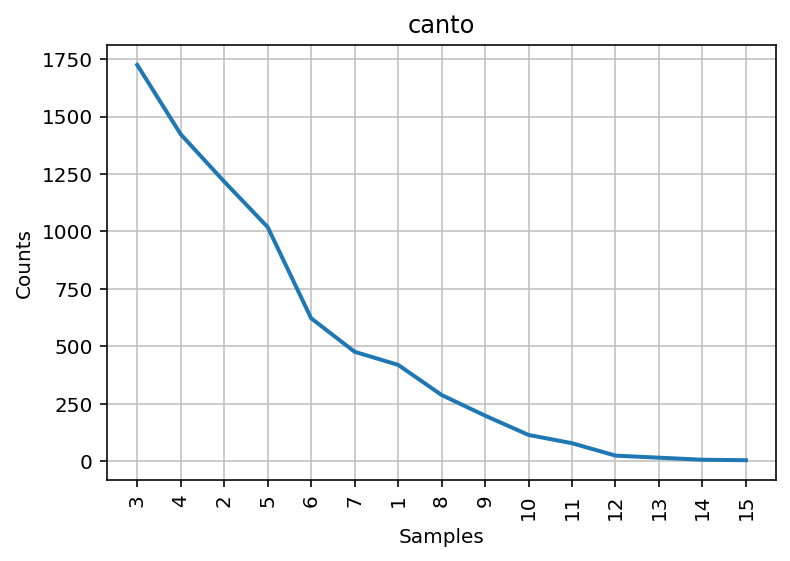

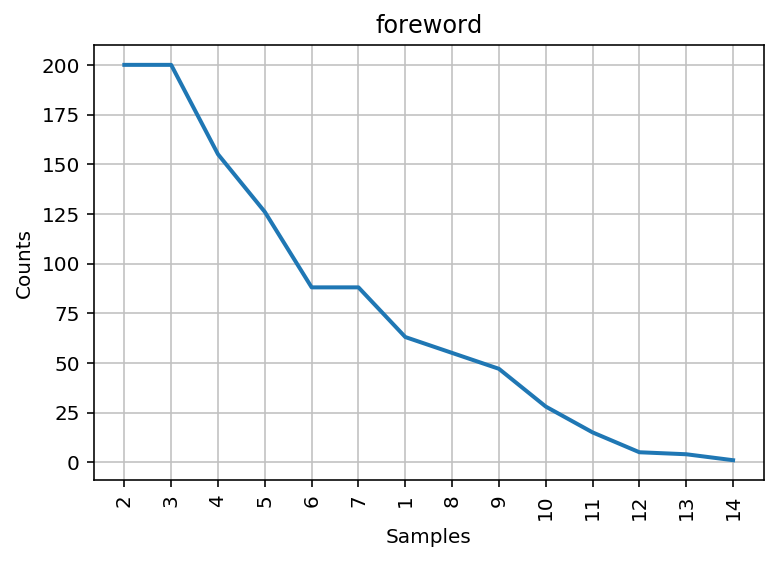

In [1]:
authors = ['humbert', 'kinbote', 'v', 'canto', 'foreword']
file_range_map = {
    'humbert': range(1,6),
    'kinbote': range(1,6),
    'v': range(1,6),
    'canto': range(1,5),
    'foreword': range(1,5)
}

# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filename):
    strings = []
    for i in file_range_map[filename]:
        with open('{}_{}.txt'.format(filename, i)) as f:
            strings.append(f.read())
    return '\n'.join(strings)


# Make a dictionary out of the authors' corpora
work_by_author = {}
for author in authors:
    work_by_author[author] = read_files_into_string(author)

# Load nltk
import nltk
%matplotlib inline

# Transform the authors' corpora into lists of word tokens
work_by_author_tokens = {}
work_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(work_by_author[author])

    # Filter out punctuation
    work_by_author_tokens[author] = ([token for token in tokens if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in work_by_author_tokens[author]]
    work_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    work_by_author_length_distributions[author].plot(15, title=author)